In [6]:
# 1. Clonar el repositorio
!git clone https://github.com/diegopalencia-research/english-verbs-nlp.git

# 2. Verificar los archivos disponibles
print("Done! Files available:")
import os

# Verificamos si la carpeta existe antes de listar
path_to_data = '/content/english-verbs-nlp/data'
if os.path.exists(path_to_data):
    for f in os.listdir(path_to_data):
        print(f)
else:
    print("Error: La ruta no existe. Verifica el nombre del repositorio.")

# El sistema debería imprimir:
# Done! Files available:
# english_verbs.xlsx

Cloning into 'english-verbs-nlp'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 31 (delta 6), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 62.66 KiB | 2.51 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Done! Files available:
english_verbs.xlsx


In [7]:
!pip install openpyxl -q
print("Ready!")

Ready!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

sns.set_theme(style='whitegrid')
plt.rcParams['figure.dpi'] = 120

print("All libraries loaded!")

All libraries loaded!


In [10]:
import pandas as pd

# 1. Definir la ruta al archivo
FILE_PATH = '/content/english-verbs-nlp/data/english_verbs.xlsx'

# 2. Cargar los datos
df_reg   = pd.read_excel(FILE_PATH, sheet_name='Regular Verbs',   header=2)
df_irreg = pd.read_excel(FILE_PATH, sheet_name='Irregular Verbs', header=2)

# 3. Nombrar las columnas (Asegurando que coincidan con tu Excel Profesional)
reg_cols = ['Base','Simple_Past','Past_Participle',
            'IPA_Base','IPA_Past','IPA_PP',
            'Phonetic_Base','Phonetic_Past','Phonetic_PP',
            'Last_Sound','Ending']

irreg_cols = ['Base','Simple_Past','Past_Participle',
              'IPA_Base','IPA_Past','IPA_PP',
              'Phonetic_Base','Phonetic_Past','Phonetic_PP',
              'Vowel_Change']

df_reg.columns   = reg_cols
df_irreg.columns = irreg_cols

# 4. Limpieza: Eliminar filas vacías
df_reg   = df_reg.dropna(subset=['Base']).reset_index(drop=True)
df_irreg = df_irreg.dropna(subset=['Base']).reset_index(drop=True)

# 5. Clasificación
df_reg['Type']   = 'Regular'
df_irreg['Type'] = 'Irregular'

# 6. Verificación de Lucidez de Mando
print(f"Regular verbs loaded:   {len(df_reg)}")
print(f"Irregular verbs loaded: {len(df_irreg)}")
print(f"Total:                  {len(df_reg) + len(df_irreg)}")

Regular verbs loaded:   160
Irregular verbs loaded: 138
Total:                  298


In [11]:
print("--- REGULAR VERBS ---")
display(df_reg.head())

print("\n--- IRREGULAR VERBS ---")
display(df_irreg.head())

--- REGULAR VERBS ---


,Base,Simple_Past,Past_Participle,IPA_Base,IPA_Past,IPA_PP,Phonetic_Base,Phonetic_Past,Phonetic_PP,Last_Sound,Ending,Type
0,accept,accepted,accepted,/əkˈsɛpt/,/əkˈsɛptɪd/,/əkˈsɛptɪd/,ak-SEPT,ak-SEP-tid,ak-SEP-tid,voiceless /t/,/ɪd/,Regular
1,achieve,achieved,achieved,/əˈtʃiːv/,/əˈtʃiːvd/,/əˈtʃiːvd/,a-CHEEV,a-CHEEVD,a-CHEEVD,voiced /v/,/d/,Regular
2,add,added,added,/æd/,/ˈædɪd/,/ˈædɪd/,AD,A-did,A-did,voiced /d/,/ɪd/,Regular
3,admit,admitted,admitted,/ədˈmɪt/,/ədˈmɪtɪd/,/ədˈmɪtɪd/,ad-MIT,ad-MI-tid,ad-MI-tid,voiceless /t/,/ɪd/,Regular
4,agree,agreed,agreed,/əˈɡriː/,/əˈɡriːd/,/əˈɡriːd/,a-GREE,a-GREED,a-GREED,voiced vowel /iː/,/d/,Regular



--- IRREGULAR VERBS ---


,Base,Simple_Past,Past_Participle,IPA_Base,IPA_Past,IPA_PP,Phonetic_Base,Phonetic_Past,Phonetic_PP,Vowel_Change,Type
0,arise,arose,arisen,/əˈraɪz/,/əˈroʊz/,/əˈrɪzən/,a-RAIZ,a-ROUZ,a-RI-zen,aɪ → oʊ,Irregular
1,awake,awoke,awoken,/əˈweɪk/,/əˈwoʊk/,/əˈwoʊkən/,a-WEIK,a-WOUK,a-WOU-ken,eɪ → oʊ,Irregular
2,be,was / were,been,/biː/,/wɒz/ /wɜːr/,/biːn/,BEE,WOZ / WER,BEEN,special form,Irregular
3,bear,bore,born,/bɛər/,/bɔːr/,/bɔːrn/,BAIR,BOR,BORN,ɛ → ɔː,Irregular
4,beat,beat,beaten,/biːt/,/biːt/,/ˈbiːtən/,BEET,BEET,BEE-ten,no vowel change,Irregular


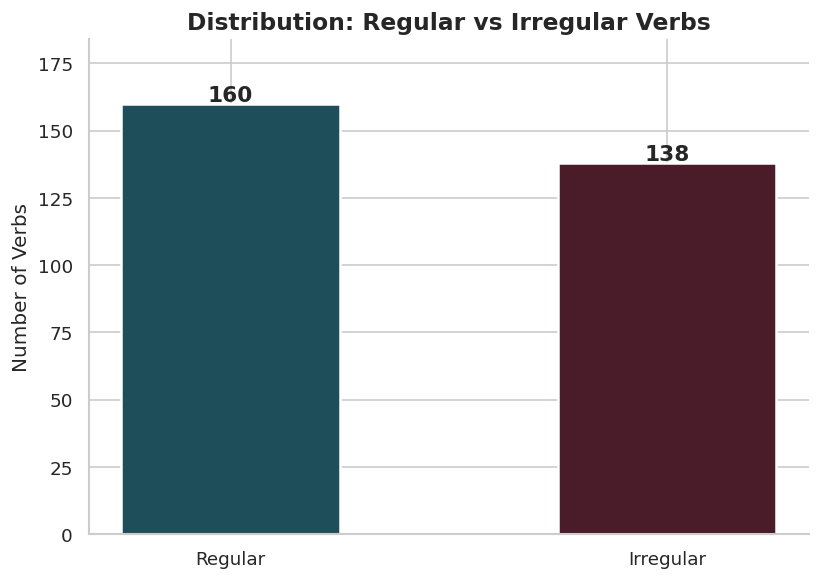

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))

counts = {'Regular': len(df_reg), 'Irregular': len(df_irreg)}
colors = ['#1D4E5A', '#4A1C2A']

bars = ax.bar(counts.keys(), counts.values(),
              color=colors, width=0.5, edgecolor='white', linewidth=1.5)

for bar, val in zip(bars, counts.values()):
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 1, str(val),
            ha='center', fontweight='bold', fontsize=13)

ax.set_title('Distribution: Regular vs Irregular Verbs',
             fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Verbs')
ax.set_ylim(0, max(counts.values()) * 1.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

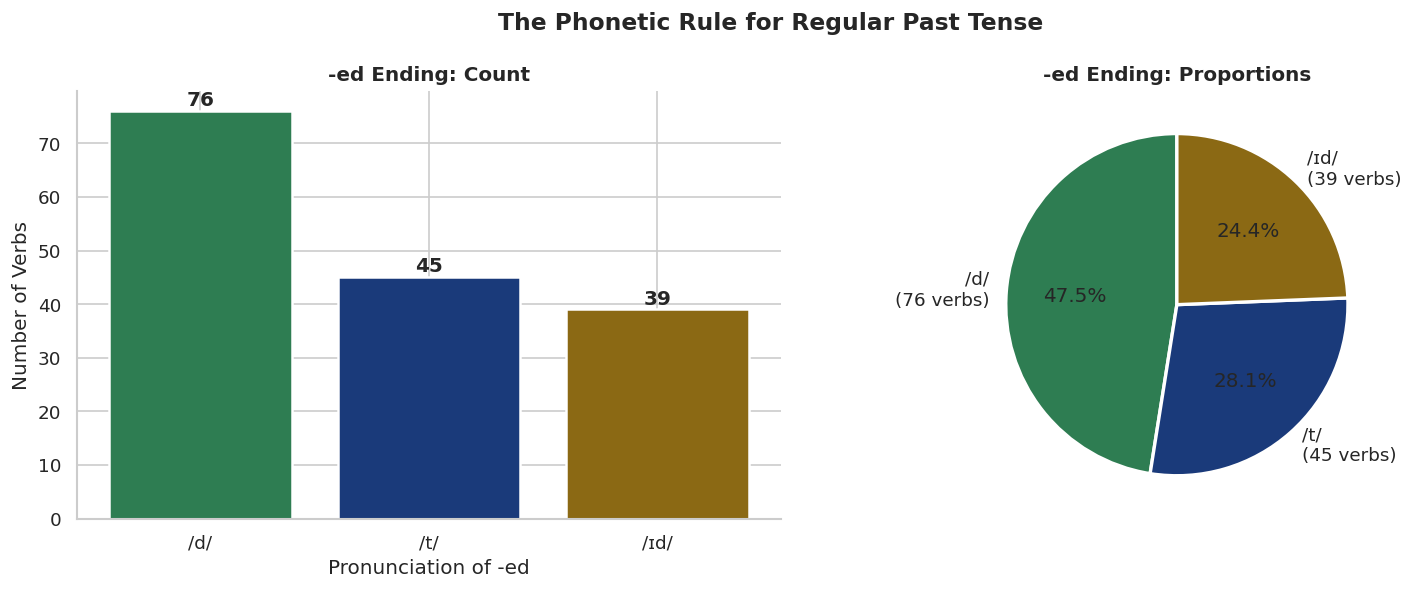

In [13]:
ending_counts = df_reg['Ending'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Left: bar chart
axes[0].bar(ending_counts.index, ending_counts.values,
            color=['#2E7D52', '#1A3A7A', '#8B6914'],
            edgecolor='white', linewidth=1.5)

for i, (idx, val) in enumerate(ending_counts.items()):
    axes[0].text(i, val + 1, str(val),
                 ha='center', fontweight='bold', fontsize=12)

axes[0].set_title('-ed Ending: Count', fontweight='bold')
axes[0].set_xlabel('Pronunciation of -ed')
axes[0].set_ylabel('Number of Verbs')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Right: pie chart
axes[1].pie(
    ending_counts.values,
    labels=[f'{idx}\n({v} verbs)' for idx, v in ending_counts.items()],
    colors=['#2E7D52', '#1A3A7A', '#8B6914'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].set_title('-ed Ending: Proportions', fontweight='bold')

plt.suptitle('The Phonetic Rule for Regular Past Tense',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
print("=== VOICELESS CONSONANT → pronounced /t/ ===")
print("Examples: walk/walked, cook/cooked, look/looked\n")
display(df_reg[df_reg['Ending']=='/t/'][['Base','Last_Sound','Ending']].head(8))

print("\n=== VOICED SOUND → pronounced /d/ ===")
print("Examples: call/called, love/loved, open/opened\n")
display(df_reg[df_reg['Ending']=='/d/'][['Base','Last_Sound','Ending']].head(8))

print("\n=== ENDS IN /t/ OR /d/ → pronounced /ɪd/ (extra syllable) ===")
print("Examples: start/started, need/needed, wait/waited\n")
display(df_reg[df_reg['Ending']=='/ɪd/'][['Base','Last_Sound','Ending']].head(8))

=== VOICELESS CONSONANT → pronounced /t/ ===
Examples: walk/walked, cook/cooked, look/looked



,Base,Last_Sound,Ending
11,ask,voiceless /k/,/t/
12,attach,voiceless /tʃ/,/t/
13,bake,voiceless /k/,/t/
17,brush,voiceless /ʃ/,/t/
23,check,voiceless /k/,/t/
34,cook,voiceless /k/,/t/
39,cross,voiceless /s/,/t/
42,dance,voiceless /s/,/t/



=== VOICED SOUND → pronounced /d/ ===
Examples: call/called, love/loved, open/opened



,Base,Last_Sound,Ending
1,achieve,voiced /v/,/d/
4,agree,voiced vowel /iː/,/d/
5,allow,voiced vowel /aʊ/,/d/
6,answer,voiced /r/,/d/
7,appear,voiced /r/,/d/
8,apply,voiced vowel /aɪ/,/d/
9,arrange,voiced /dʒ/,/d/
10,arrive,voiced /v/,/d/



=== ENDS IN /t/ OR /d/ → pronounced /ɪd/ (extra syllable) ===
Examples: start/started, need/needed, wait/waited



,Base,Last_Sound,Ending
0,accept,voiceless /t/,/ɪd/
2,add,voiced /d/,/ɪd/
3,admit,voiceless /t/,/ɪd/
22,chat,voiceless /t/,/ɪd/
27,collect,voiceless /t/,/ɪd/
28,communicate,voiceless /t/,/ɪd/
30,complete,voiceless /t/,/ɪd/
31,connect,voiceless /t/,/ɪd/


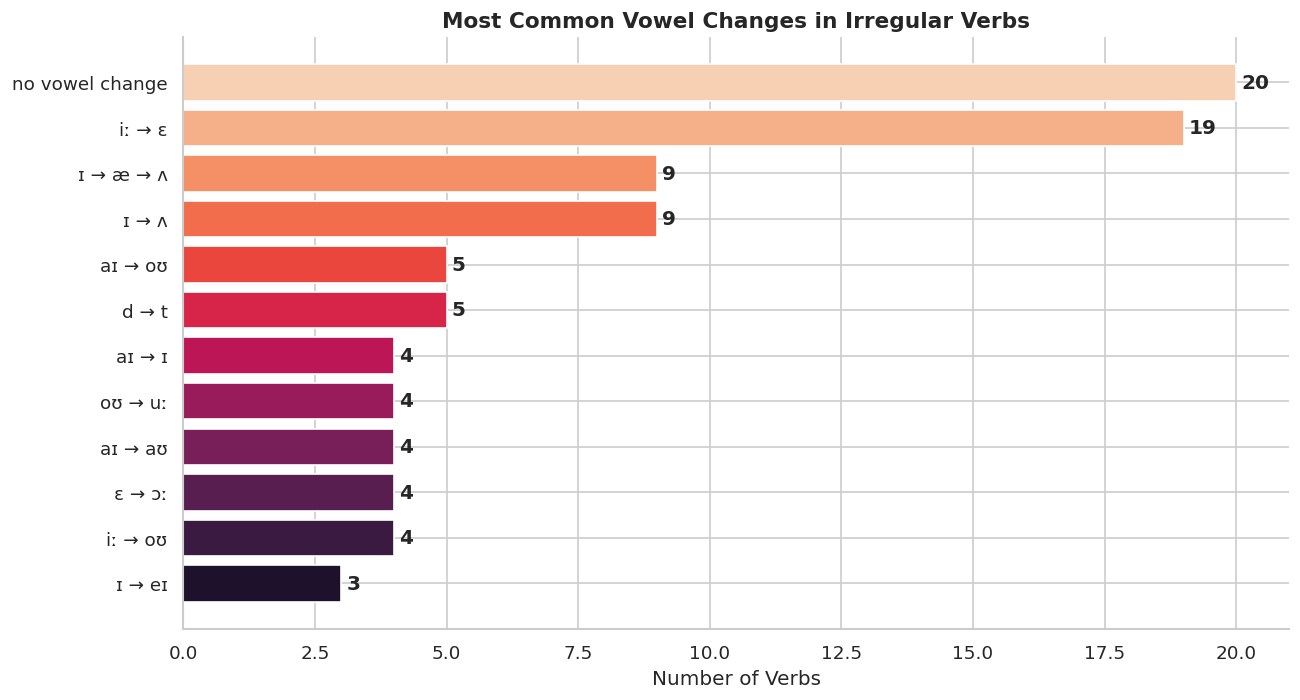


Top pattern: iː → ɛ
Examples: feel/felt, keep/kept, sleep/slept, meet/met, leave/left


In [15]:
vc_counts = df_irreg['Vowel_Change'].value_counts().head(12)

fig, ax = plt.subplots(figsize=(11, 6))
palette = sns.color_palette('rocket_r', len(vc_counts))

bars = ax.barh(vc_counts.index[::-1], vc_counts.values[::-1],
               color=palette[::-1], edgecolor='white')

for bar, val in zip(bars, vc_counts.values[::-1]):
    ax.text(bar.get_width() + 0.1,
            bar.get_y() + bar.get_height() / 2,
            str(val), va='center', fontweight='bold')

ax.set_title('Most Common Vowel Changes in Irregular Verbs',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Number of Verbs')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print("\nTop pattern: iː → ɛ")
print("Examples: feel/felt, keep/kept, sleep/slept, meet/met, leave/left")

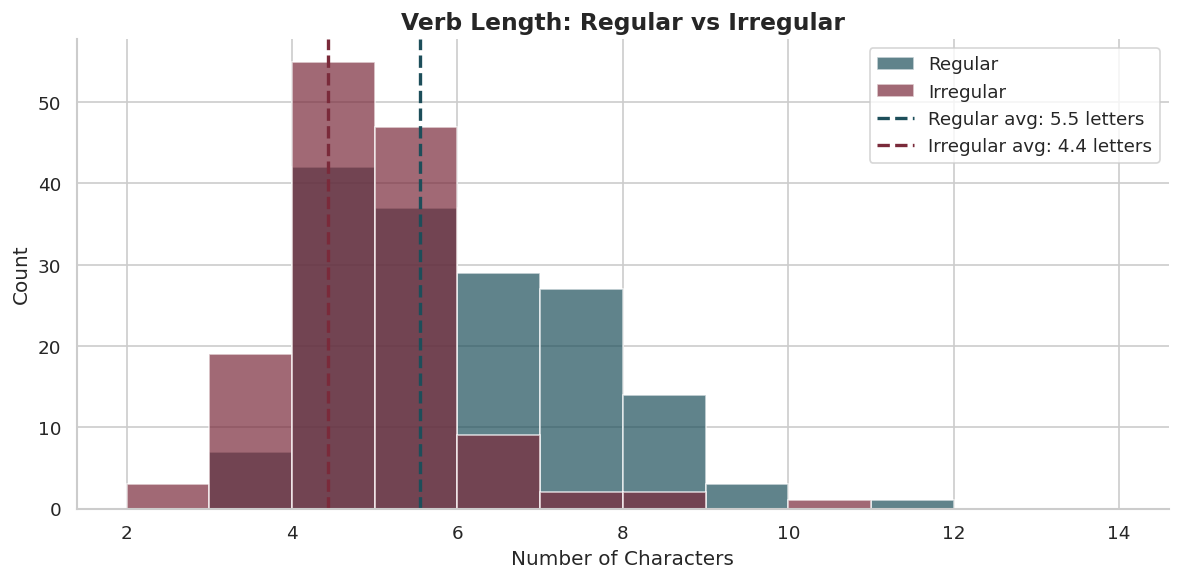


Insight: Irregular verbs tend to be shorter.
Reason: they come from Old English — ancient, short root words.


In [16]:
df_reg['length']   = df_reg['Base'].str.len()
df_irreg['length'] = df_irreg['Base'].str.len()

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df_reg['length'],   bins=range(2, 15), alpha=0.7,
        color='#1D4E5A', label='Regular',   edgecolor='white')
ax.hist(df_irreg['length'], bins=range(2, 15), alpha=0.7,
        color='#7A2A3A', label='Irregular', edgecolor='white')

ax.axvline(df_reg['length'].mean(),   color='#1D4E5A', linestyle='--',
           linewidth=2, label=f"Regular avg: {df_reg['length'].mean():.1f} letters")
ax.axvline(df_irreg['length'].mean(), color='#7A2A3A', linestyle='--',
           linewidth=2, label=f"Irregular avg: {df_irreg['length'].mean():.1f} letters")

ax.set_title('Verb Length: Regular vs Irregular', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Characters')
ax.set_ylabel('Count')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print("\nInsight: Irregular verbs tend to be shorter.")
print("Reason: they come from Old English — ancient, short root words.")

In [17]:
# This converts text into numbers so the ML model can understand it

def extract_features(df):
    features = pd.DataFrame()

    features['length']          = df['Base'].str.len()
    features['vowel_count']     = df['Base'].str.count('[aeiou]')
    features['consonant_count'] = df['Base'].str.count('[bcdfghjklmnpqrstvwxyz]')

    for suffix in ['e','n','d','t','l','r','k','g','w','y',
                   'ng','nd','ld','nt','in','ow','aw']:
        features[f'ends_{suffix}'] = df['Base'].str.endswith(suffix).astype(int)

    le = LabelEncoder()
    features['last_letter'] = le.fit_transform(df['Base'].str[-1].fillna('_'))
    features['second_last'] = le.fit_transform(df['Base'].str[-2].fillna('_'))

    return features

# Combine both datasets
df_all = pd.concat([df_reg, df_irreg], ignore_index=True)

X = extract_features(df_all)
y = (df_all['Type'] == 'Irregular').astype(int)  # 1=Irregular, 0=Regular

print(f"Features created: {X.shape[1]} features")
print(f"Total verbs:      {X.shape[0]}")
print(f"\nFeature names:\n{list(X.columns)}")

Features created: 22 features
Total verbs:      298

Feature names:
['length', 'vowel_count', 'consonant_count', 'ends_e', 'ends_n', 'ends_d', 'ends_t', 'ends_l', 'ends_r', 'ends_k', 'ends_g', 'ends_w', 'ends_y', 'ends_ng', 'ends_nd', 'ends_ld', 'ends_nt', 'ends_in', 'ends_ow', 'ends_aw', 'last_letter', 'second_last']


In [18]:
# Split: 80% to train, 20% to test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Training verbs: {len(X_train)}")
print(f"Testing verbs:  {len(X_test)}")

# Train both models
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6)
rf.fit(X_train, y_train)

lr_acc = accuracy_score(y_test, lr.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"\nLogistic Regression: {lr_acc:.1%}")
print(f"Random Forest:       {rf_acc:.1%}")

Training verbs: 238
Testing verbs:  60

Logistic Regression: 66.7%
Random Forest:       75.0%


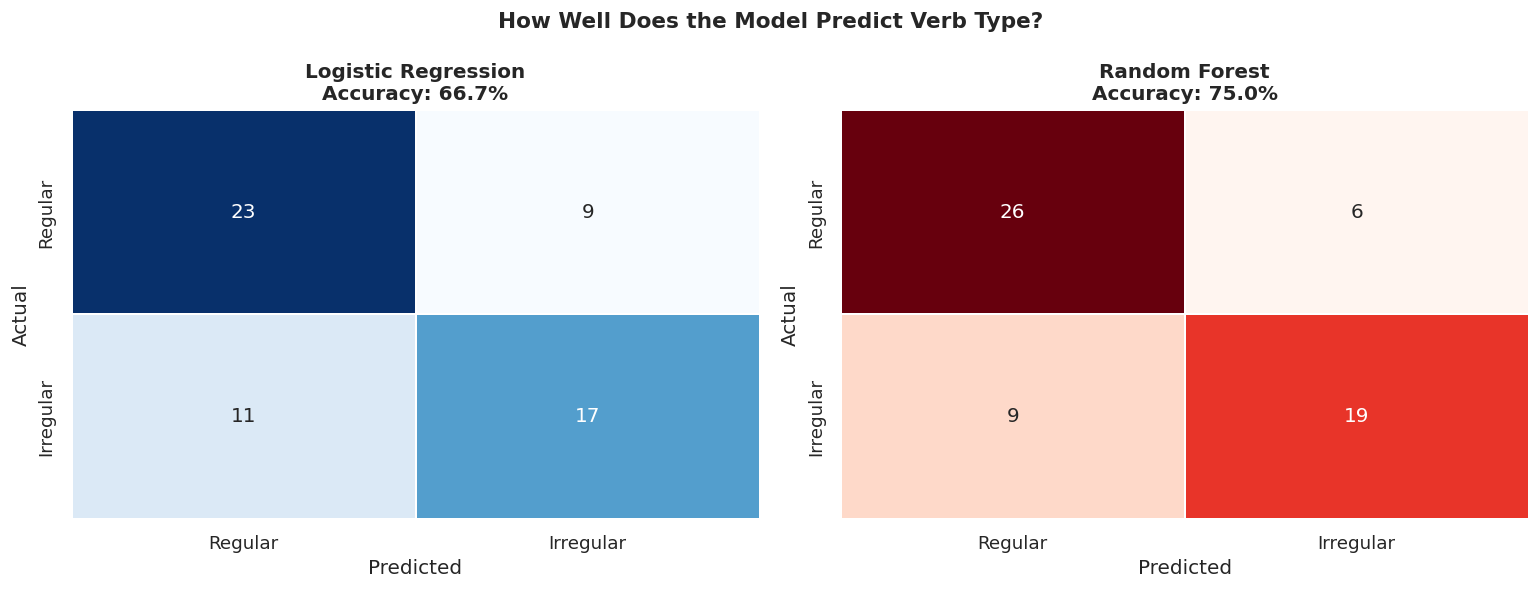


HOW TO READ THIS:
Top-left  = correctly said Regular   ✅
Bot-right = correctly said Irregular ✅
Top-right = said Irregular but was Regular ❌
Bot-left  = said Regular but was Irregular ❌


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

for ax, model, title, cmap in zip(
    axes,
    [lr, rf],
    ['Logistic Regression', 'Random Forest'],
    ['Blues', 'Reds']
):
    preds = model.predict(X_test)
    cm    = confusion_matrix(y_test, preds)
    acc   = accuracy_score(y_test, preds)

    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax,
                xticklabels=['Regular', 'Irregular'],
                yticklabels=['Regular', 'Irregular'],
                linewidths=1, linecolor='white', cbar=False)

    ax.set_title(f'{title}\nAccuracy: {acc:.1%}', fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('How Well Does the Model Predict Verb Type?',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nHOW TO READ THIS:")
print("Top-left  = correctly said Regular   ✅")
print("Bot-right = correctly said Irregular ✅")
print("Top-right = said Irregular but was Regular ❌")
print("Bot-left  = said Regular but was Irregular ❌")

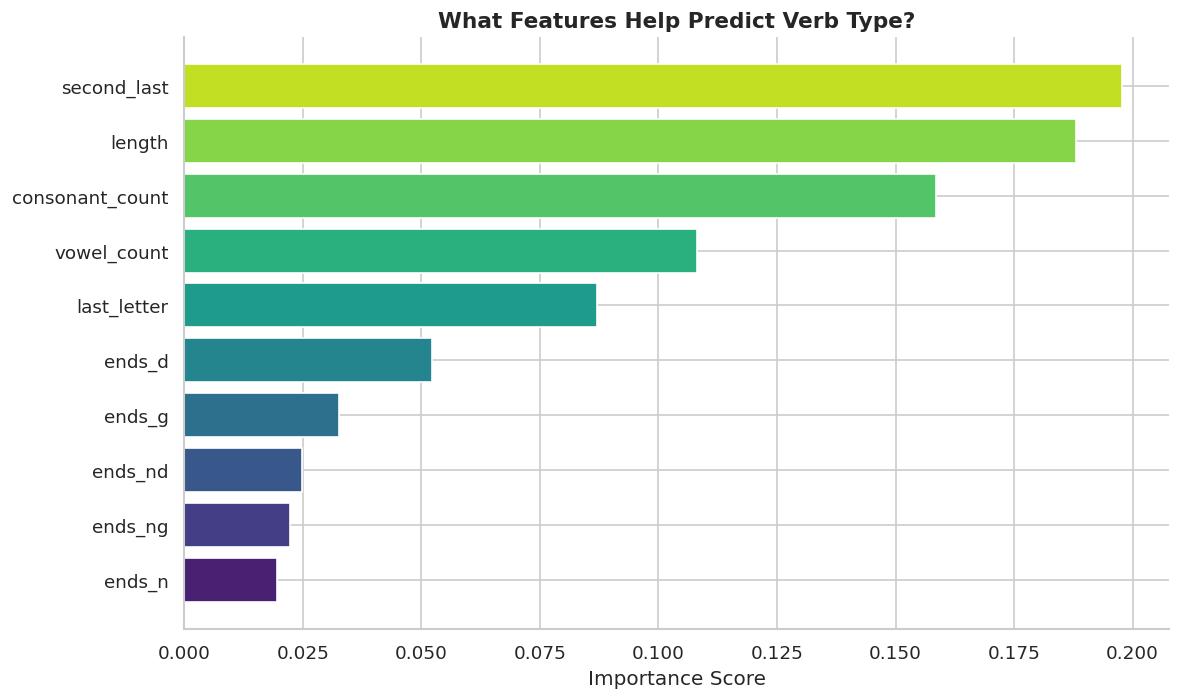

In [20]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True).tail(10)

fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette('viridis', len(importances))
ax.barh(importances.index, importances.values,
        color=colors, edgecolor='white')

ax.set_title('What Features Help Predict Verb Type?',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Importance Score')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [21]:
def predict_verb(verb):
    row      = pd.DataFrame([{'Base': verb}])
    features = extract_features(row)
    prob     = rf.predict_proba(features)[0]
    label    = 'Irregular' if prob[1] > 0.5 else 'Regular'
    conf     = max(prob) * 100

    print(f"Verb:        '{verb}'")
    print(f"Prediction:   {label}  ({conf:.1f}% confidence)")

    if label == 'Regular':
        last = verb[-1]
        if last in 'td':
            rule = "ends in /t/ or /d/ → past tense adds extra syllable /ɪd/"
        elif last in 'pkfscx':
            rule = "ends in voiceless consonant → past tense sounds like /t/"
        else:
            rule = "ends in voiced sound → past tense sounds like /d/"
        print(f"Phonetic:     {rule}")
    print()

print("=== Modern/tech verbs — are they regular? ===\n")
for v in ['google', 'stream', 'tweet', 'zoom', 'swipe', 'upload', 'delete', 'code']:
    predict_verb(v)

=== Modern/tech verbs — are they regular? ===

Verb:        'google'
Prediction:   Regular  (70.4% confidence)
Phonetic:     ends in voiced sound → past tense sounds like /d/

Verb:        'stream'
Prediction:   Regular  (51.1% confidence)
Phonetic:     ends in voiced sound → past tense sounds like /d/

Verb:        'tweet'
Prediction:   Irregular  (61.0% confidence)

Verb:        'zoom'
Prediction:   Irregular  (76.2% confidence)

Verb:        'swipe'
Prediction:   Irregular  (63.1% confidence)

Verb:        'upload'
Prediction:   Regular  (60.3% confidence)
Phonetic:     ends in /t/ or /d/ → past tense adds extra syllable /ɪd/

Verb:        'delete'
Prediction:   Regular  (70.4% confidence)
Phonetic:     ends in voiced sound → past tense sounds like /d/

Verb:        'code'
Prediction:   Irregular  (79.3% confidence)



In [22]:
best = rf if rf_acc >= lr_acc else lr
name = 'Random Forest' if rf_acc >= lr_acc else 'Logistic Regression'
pred = best.predict(X_test)

print(f"=== Best Model: {name} ===\n")
print(classification_report(y_test, pred,
                             target_names=['Regular', 'Irregular']))

print("WHAT THIS MEANS:")
print("Precision = when it predicts X, how often is it correct?")
print("Recall    = of all real X verbs, how many did it find?")
print("F1        = balance of both — closer to 1.0 is better")

=== Best Model: Random Forest ===

              precision    recall  f1-score   support

     Regular       0.74      0.81      0.78        32
   Irregular       0.76      0.68      0.72        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

WHAT THIS MEANS:
Precision = when it predicts X, how often is it correct?
Recall    = of all real X verbs, how many did it find?
F1        = balance of both — closer to 1.0 is better


In [29]:
import os

# ── 1. Your details ───────────────────────────────────────────
TOKEN    = 'YOUR_TOKEN_HERE'       # the token you just copied
USERNAME = 'diegopalencia-research'
EMAIL    = 'contacto.diegopalencia@gmail.com'              # your GitHub email
REPO     = 'english-verbs-nlp'
# ─────────────────────────────────────────────────────────────

os.chdir(f'/content/{REPO}')

# ── 2. Save the current notebook into the repo ───────────────
!jupyter nbconvert --to notebook \
    /content/english-verbs-nlp/notebooks/analysis.ipynb\ Notebooks/analysis.ipynb \
    --output /content/{REPO}/notebooks/analysis.ipynb 2>/dev/null

# If the line above fails, use this simpler version:
import shutil, glob

# Find the notebook wherever Colab saved it
matches = glob.glob('/content/**/*.ipynb', recursive=True)
for m in matches:
    if 'english-verbs-nlp' not in m:
        print(f"Found notebook at: {m}")

print("\nIf you see the path above, we'll copy from there next.")

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

In [31]:
import os

TOKEN    = 'YOUR_TOKEN_HERE'
USERNAME = 'diegopalencia-research'
EMAIL    = 'contacto.diegopalencia@gmail.com'
REPO     = 'english-verbs-nlp'

os.chdir(f'/content/{REPO}')

# Configure identity
os.system(f'git config user.email "{EMAIL}"')
os.system(f'git config user.name "{USERNAME}"')

# Set remote URL with token embedded (this fixes the authentication error)
os.system(f'git remote set-url origin https://{TOKEN}@github.com/{USERNAME}/{REPO}.git')

# Copy notebook (adjust path if Step 2 showed a different location)
!cp /content/english-verbs-nlp/../*.ipynb \
    /content/english-verbs-nlp/notebooks/analysis.ipynb 2>/dev/null || \
    echo "Will copy manually"

# Push
!git add .
!git status
!git commit -m "Add complete analysis: 5 charts and ML model"
!git push origin main

Will copy manually
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
